In [2]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets

Isotropic emitter

$$E_n = a_n\sin(\omega t + n\Psi)$$
$$\Psi = \frac{2\pi}{\lambda}\tau + \phi = \frac{2\pi}{\lambda}d\sin\theta + \phi$$
$$E = \sum_n^{N-1}E_n = a_0\sin(\omega t) + ... + a_{N-1}sin(\omega t + (N-1)\Psi$$
$$|E| = \left|\frac{\sin(\frac{N\pi d\sin \theta}{\lambda})}{N\sin(\frac{\pi d\sin \theta}{\lambda})}\right|$$
$$\lambda = \frac{v_s}{f}$$
$$|E| = \left|\frac{\sin(\frac{N\pi d\sin \theta f}{v_s})}{N\sin(\frac{\pi d\sin \theta f}{v_s})}\right|$$

In [47]:
def get_array_magnitude(f, d, theta):
    v_s = 343     # m/s, speed of sound
    N = 8         # number of speakers
    x = np.pi * d * np.sin(theta) * f / v_s
    nom = np.sin(N * x)
    den = N * np.sin(x)
    return np.abs(nom / den)

In [48]:
f = 400       # Hz, frequency
lbd = v_s / f # m, wavelength
d = lbd / 2   # m, distance between speakers
eps = 1e-6
thetas = np.linspace(-np.pi/2 + eps, np.pi/2 - eps, 100)
Es = [get_array_magnitude(f, d, t) for t in thetas]
max_e = np.max(Es)
Es = [20 * np.log(e / max_e) for e in Es]

Text(0.5, 1.0, 'Radiation pattern for f=400 Hz and d=42.9 cm')

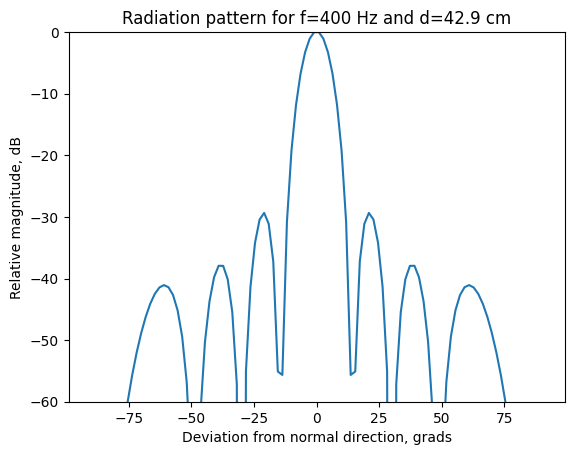

In [49]:
plt.plot(thetas * 180 / np.pi, Es)
plt.ylim(-60, 0)
plt.ylabel("Relative magnitude, dB")
plt.xlabel("Deviation from normal direction, grads")
plt.title(f"Radiation pattern for f={f} Hz and d={100 * d:.1f} cm")

In [33]:
_, properties = sp.signal.find_peaks(Es, height=-80)
peak_heights = properties['peak_heights']
peak2 = np.sort(peak_heights)[-2]
print(f"Second peak: {peak2:.1f} dB")

Second peak: -29.5 dB


In [51]:
def draw_plot(f, d_l_ratio):
    lbd = v_s / f         # m, wavelength
    d = lbd * d_l_ratio   # m, distance between speakers
    eps = 1e-6
    thetas = np.linspace(-np.pi/2 + eps, np.pi/2 - eps, 100)
    Es = [get_array_magnitude(f, d, t) for t in thetas]
    max_e = np.max(Es)
    Es = [20 * np.log(e / max_e) for e in Es]
    plt.plot(thetas * 180 / np.pi, Es)
    plt.ylim(-60, 0)
    plt.ylabel("Relative magnitude, dB")
    plt.xlabel("Deviation from normal direction, grads")
    plt.title(f"Radiation pattern for f={f:.1f} Hz and d={100 * d:.1f} cm")

In [58]:
f_range = widgets.FloatSlider(min=200, max=2000, value=400)
d_range = widgets.FloatSlider(min=0.05, max=1.0, step=0.05, value=0.5)

widgets.interact(draw_plot, f=f_range, d_l_ratio=d_range)
# does not depend on |frequency

interactive(children=(FloatSlider(value=400.0, description='f', max=2000.0, min=200.0), FloatSlider(value=0.5,…

<function __main__.draw_plot(f, d_l_ratio)>

We need the distance of 40 cm between